# Exercise 0 

## Task 1: Recreate graphs

### a) Here we use subplots to get two axes in one figure

In [2]:
import pandas as pd

df = pd.read_csv("data/Steam Top 100 Played Games - List.csv")

In [3]:
print(df.dtypes)

Rank                int64
Name               object
Thumbnail URL      object
Store Link         object
Price              object
Current Players    object
Peak Today         object
Genre Tags         object
dtype: object


In [4]:
df['Current Players'] = pd.to_numeric(df['Current Players'].str.replace(',', '', regex=False), errors='coerce')
df['Peak Today'] = pd.to_numeric(df['Peak Today'].str.replace(',', '', regex=False), errors='coerce')

In [5]:
print(df.dtypes)

Rank                int64
Name               object
Thumbnail URL      object
Store Link         object
Price              object
Current Players     int64
Peak Today          int64
Genre Tags         object
dtype: object


In [6]:
df.head(5)

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,Free To Play,1485535,1489929,"FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,Free To Play,765150,765150,"Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,Free To Play,698757,715295,"Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,Free To Play,312427,565653,"Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,£23.93,258475,288757,"Action RPG, Hack and Slash, RPG, Action, Souls..."


In [7]:
df['Price'] = df['Price'].str.replace('Free To Play', '0', regex=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace('£', '', regex=False), errors='coerce')
df.head(5)

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,0.00,1485535,1489929,"FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,0.00,765150,765150,"Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,0.00,698757,715295,"Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,0.00,312427,565653,"Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,23.93,258475,288757,"Action RPG, Hack and Slash, RPG, Action, Souls..."


In [8]:
import duckdb 

df_players_price = duckdb.query("""--sql
            SELECT 
                Name,
                "Current Players",
                "Price"
             FROM df 
             ORDER BY  "Current Players" DESC
             """).df().iloc[:10]

df_players_price

,Name,Current Players,Price
0,Counter-Strike 2,1485535,0.00
1,PUBG: BATTLEGROUNDS,765150,0.00
2,Dota 2,698757,0.00
3,Marvel Rivals,312427,0.00
4,Path of Exile 2,258475,23.93
5,Grand Theft Auto V,207117,14.80
6,NARAKA: BLADEPOINT,201876,0.00
7,Rust,168002,34.99
8,Palworld,165613,24.99
9,Apex Legends™,150754,0.00


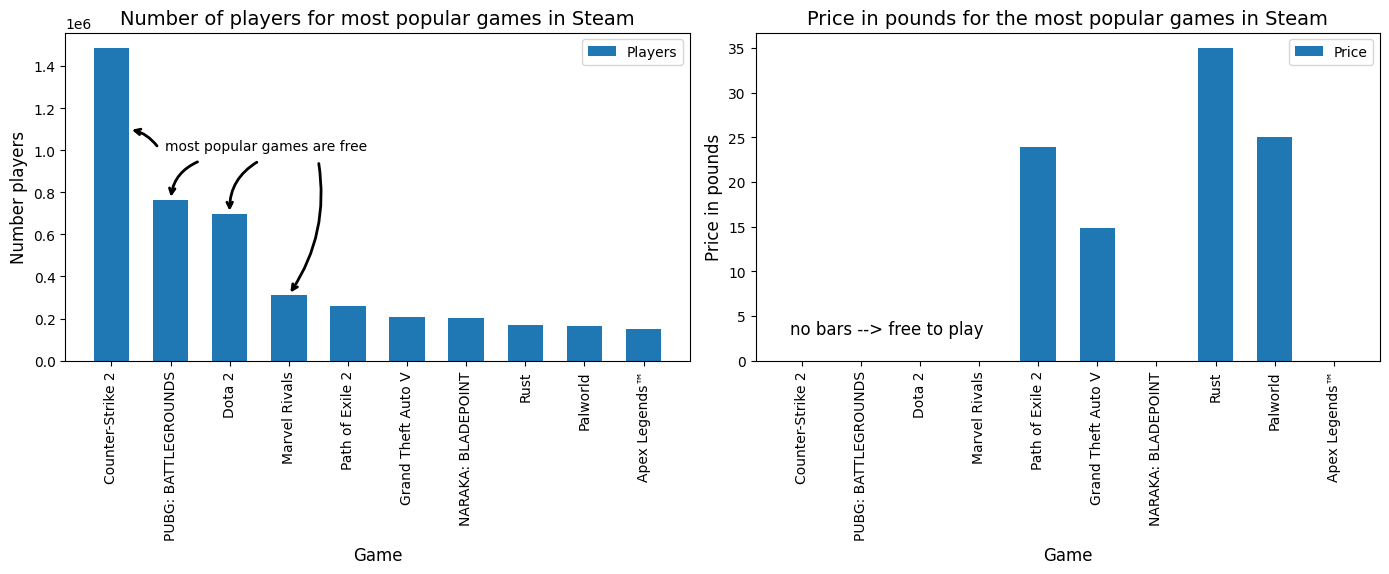

In [ ]:
import matplotlib.pyplot as plt

# df_players_price["Name"] is  x-axis labels
names = df_players_price["Name"]
bar_width = 0.6 
# Create the figure and axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))  # 1x2 grid

# Plot data into each subplot
axs[0].bar(
    x = names,
    height=df_players_price["Current Players"],
    width=bar_width,
    label= "Players"
    )

axs[0].legend()
axs[0].set_title("Number of players for most popular games in Steam", fontsize=14)
axs[0].set_xlabel("Game", fontsize=12)
axs[0].set_ylabel("Number players", fontsize=12)


axs[0].set_xticks(range(len(names)))  # Set the tick positions
axs[0].set_xticklabels(df_players_price["Name"], rotation = 90) # Set the labels and rotate

##############################
# Annotate
##############################
text_position = (0.9, 1e6)

# Shared annotation text
axs[0].text(*text_position, "most popular games are free")

# Multiple arrows from that text to different bars
target_xs = [0, 1, 2, 3]  # indices of bars

# Get the y-values for the bars you want to point to
target_ys = df_players_price["Current Players"].iloc[target_xs]

# Define custom arrow origins and curvatures
custom_arrows = [
    {'xytext': (0.8, 1.01e6), 'rad': 0.2},
    {'xytext': (1.5, 0.95e6), 'rad': 0.3},
    {'xytext': (2.5, 0.95e6), 'rad': 0.3},
    {'xytext': (3.5, 0.95e6), 'rad': -0.2},
]

# Draw arrows
for i, props in enumerate(custom_arrows):
    if i == 0:
        # Custom endpoint: right side of bar 0 at a specific height
        xy = (i + bar_width / 2, 1100000)  # target x = bar center + half width
    else:
        # Default: top of bar
        xy = (i, df_players_price["Current Players"].iloc[i])

    axs[0].annotate(
        text="",
        xy=xy,
        xytext=props['xytext'],
        arrowprops=dict(
            arrowstyle="->",
            linewidth=2,
            connectionstyle=f"arc3,rad={props['rad']}"
        )
    )

# ----------------------------------------------#
axs[1].bar(
    x = names,
    height=df_players_price["Price"],
    width=bar_width,
    label= "Price"
    )

axs[1].legend()
axs[1].set_title("Price in pounds for the most popular games in Steam", fontsize=14)
axs[1].set_xlabel("Game", fontsize=12)
axs[1].set_ylabel("Price in pounds", fontsize=12)

axs[1].set_xticks(range(len(names)))  # Set the tick positions
axs[1].set_xticklabels(df_players_price["Name"], rotation = 90)

text_position_1 = (-0.2, 3)

# annotation text
axs[1].text(*text_position_1, "no bars --> free to play", fontsize=12)

# Final layout tweaks
plt.tight_layout()
plt.show()

### b) This one will require some data processing to be able to come to this point.

In [ ]:
import pandas as pd
from collections import Counter


df = pd.read_csv("data/Steam Top 100 Played Games - List.csv")

# Step 1: Split strings into lists
df["List Tags"] = df["Genre Tags"].str.split(", ")
#df["List Tags"].head(5)

# Step 2: Flatten the list of lists into a single list
all_tags = [tag for tag_list in df["List Tags"] for tag in tag_list]
#all_tags

# Step 3: Count the tags
tag_counts = Counter(all_tags)
#tag_counts

# Step 4 (optional): Convert to DataFrame for display
tag_counts_df = pd.DataFrame(tag_counts.items(), columns=["Tag", "Count"])
tag_counts_df = tag_counts_df.sort_values(by="Count", ascending=False).reset_index(drop=True)
tag_counts_top5 = tag_counts_df.iloc[1:6]
# Display top 10 tags
tag_counts_top5.set_index("Tag")

,Count
Tag,
Multiplayer,71
Action,64
Singleplayer,55
Open World,45
Co-op,42


[Text(0, 0, 'Multiplayer'),
 Text(1, 0, 'Action'),
 Text(2, 0, 'Singleplayer'),
 Text(3, 0, 'Open World'),
 Text(4, 0, 'Co-op')]

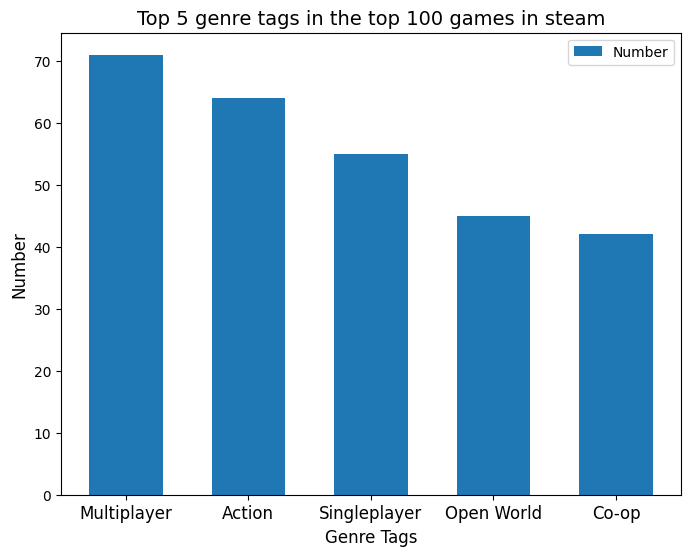

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(
    x=tag_counts_top5["Tag"],
    height=tag_counts_top5["Count"],
    width=0.6,
    label= "Number"
)

ax.legend()
ax.set_title("Top 5 genre tags in the top 100 games in steam", fontsize=14)
ax.set_xlabel("Genre Tags", fontsize=12)
ax.set_ylabel("Number", fontsize=12)

names_x= tag_counts_top5["Tag"]
ax.set_xticks(range(len(names_x)))  # Set the tick positions
ax.set_xticklabels(names_x, fontsize = 12)

### c) A df has a hist() method for creating histogram

In [13]:
# Step 1: Split strings into lists
df["List Tags"] = df["Genre Tags"].str.split(", ")

# Step 2: Remove "+" from each list
df["List Tags"] = df["List Tags"].apply(lambda tags: [tag for tag in tags if tag != "+"])

# Step 3: Count number of tags
df["Tag Count"] = df["List Tags"].apply(len)


df_tags_no = df[["List Tags", "Tag Count"]].copy()
df_tags_no

,List Tags,Tag Count
0,"[FPS, Shooter, Multiplayer, Competitive, Actio...",20
1,"[Survival, Shooter, Battle Royale, Multiplayer...",20
2,"[Free to Play, MOBA, Multiplayer, Strategy, eS...",20
3,"[Free to Play, Multiplayer, Hero Shooter, Thir...",20
4,"[Action RPG, Hack and Slash, RPG, Action, Soul...",20
...,...,...
95,"[Turn-Based Strategy, Strategy, Turn-Based, Mu...",20
96,"[Action, FPS, Multiplayer, Shooter, Classic, T...",20
97,"[City Builder, Simulation, Building, Managemen...",20
98,"[Open World, Post-apocalyptic, Singleplayer, RPG]",4


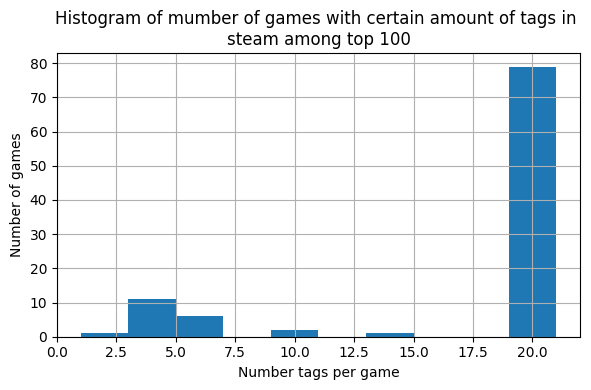

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
#plt.hist(df_tags_no["Tag Count"])
plt.hist(df_tags_no["Tag Count"], bins=10, range=(1,21))#, bins=range(1, df_tags_no["Tag Count"].max() + 2) , edgecolor='black'

plt.title("Histogram of mumber of games with certain amount of tags in \nsteam among top 100", )
plt.xlabel("Number tags per game")
plt.ylabel("Number of games")
plt.grid()
plt.tight_layout()
plt.show()
